In [91]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [244]:
data = datasets.load_iris()

X = data.data
y = data.target
y = np.where(y == 1,1, 0)

In [245]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

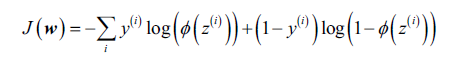

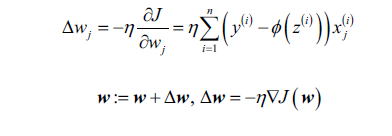

In [303]:
m = 2000
eta = 0.00001

def loss_function(X, y, weights):
    
    zeta = zeta_linear(X, weights) 
    phi = sigmoid(zeta)
    
    log_phi = np.log(phi)
    y_mult_log = np.dot(y, log_phi)
    
    one_minus_log_phi = np.log(1 - phi)
    y_minus_one_mult_log = np.dot(1 - y, one_minus_log_phi)
    
    loss = -(y_mult_log + y_minus_one_mult_log).sum()
    return loss
    
def sigmoid(zeta):
    return 1 / (1 + np.exp(-zeta))
    
def zeta_linear(x, w):
    return np.dot(x, w[1:]) + w[0]
    
    
def logistic_regressor(X, y, m, eta):
    
    loss = []
    w_ = []
    weights = np.zeros(X.shape[1] + 1)
    for i in range(m):
        
        zeta = zeta_linear(X, weights) 
        phi = sigmoid(zeta)
        error = (y - phi)
        error = eta * np.dot(error, X).sum()
        
        weights[1:] = weights[1:] - error
        weights[0] = weights[0] + eta * error.sum()
        w_.append(weights)
        
        cost = loss_function(X,y, weights)
        
        loss.append(cost)
        
    return loss, w_

In [304]:
loss, weights = logistic_regressor(X_train, y_train, m, eta)

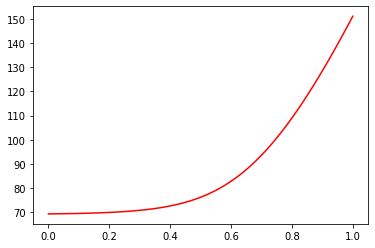

In [305]:
plt.plot(np.linspace(0,1,m), loss, color = 'red')
